# MODELOS PARA DETECÇÃO DE FRAUDES UTILIZANDO  
# TÉCNICAS DE APRENDIZADO DE MÁQUINA

Dado que cada vez mais tem aumentado a taxa de fraudes em transferências de cartão de crédito, é importante para as empresas desenvolver modelos que consigam prever quando uma transação pode ser fraudulenta ou não, com uma alta taxa de confiabilidade. Dado este cenário e o desafio imposto pelo Serasa, neste Notebook defino alguns objetivos que estão explorados ao longo deste notebook, sendo eles:

## Lista e Abreivatura e Siglas

| SIGLA | DESCRIÇÃO |
| ----- | --------- |
| AC | Ada Boost Classifier |
| BC | Bagging Classifier |
| GB | Gradient Booting Classifier |
| KS | Kolmogorov-Smirnov |
| NB | Naive Bayes |
| RF | Random Forest |
| RL | Regression Logitics |
| FPD | First Payment Default |
| ROC | Receiver Operating Characteristc |
| SVM | Support Vector Machine |

# 1 Introdução

A avaliação de fraude é um processo complexo, pois ao contrário do crédito,
onde é possível avaliar com precisão quais clientes pagaram ou não pagaram uma dívida, a identificação deste evento é controversa, pois nem sempre existe uma variável
que identifique este evento.

Portanto, a identificação de fraude pode ocorrer no momento da concessão de
um produto, onde avaliações de documentos e outros processos de validação captu-
ram estes casos. Este é o evento mais comumente considerado ao desenvolver um
modelo de fraude. Entretanto, se o processo atual já identificou este tipo de fraude, o
modelo irá apenas ratificar o perfil encontrado. Dentro destas marcações, em alguns
casos, podem existir **falsos positivos**, e não é possível sua confirmação, tendo em vista
o cliente ter sido recusado na entrada.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
base_file = os.path.join(os.getcwd(), '..', 'data', 'files')

In [3]:
df_cc = pd.read_csv(os.path.join(base_file, 'kaggle-creditcard.csv'), encoding='utf-8')

Descrição dos dados - cinco primeiras linhas

In [4]:
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Verificar os tipos de dados

In [ ]:
df_cc.dtypes

Verificar a distribuição dos dados para cada variável

In [5]:
def imprimeHistogramas(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(40, 20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature)
        ax.set_yscale('log')
    fig.tight_layout()
    # plt.savefig('Histogram.png')
    plt.show()

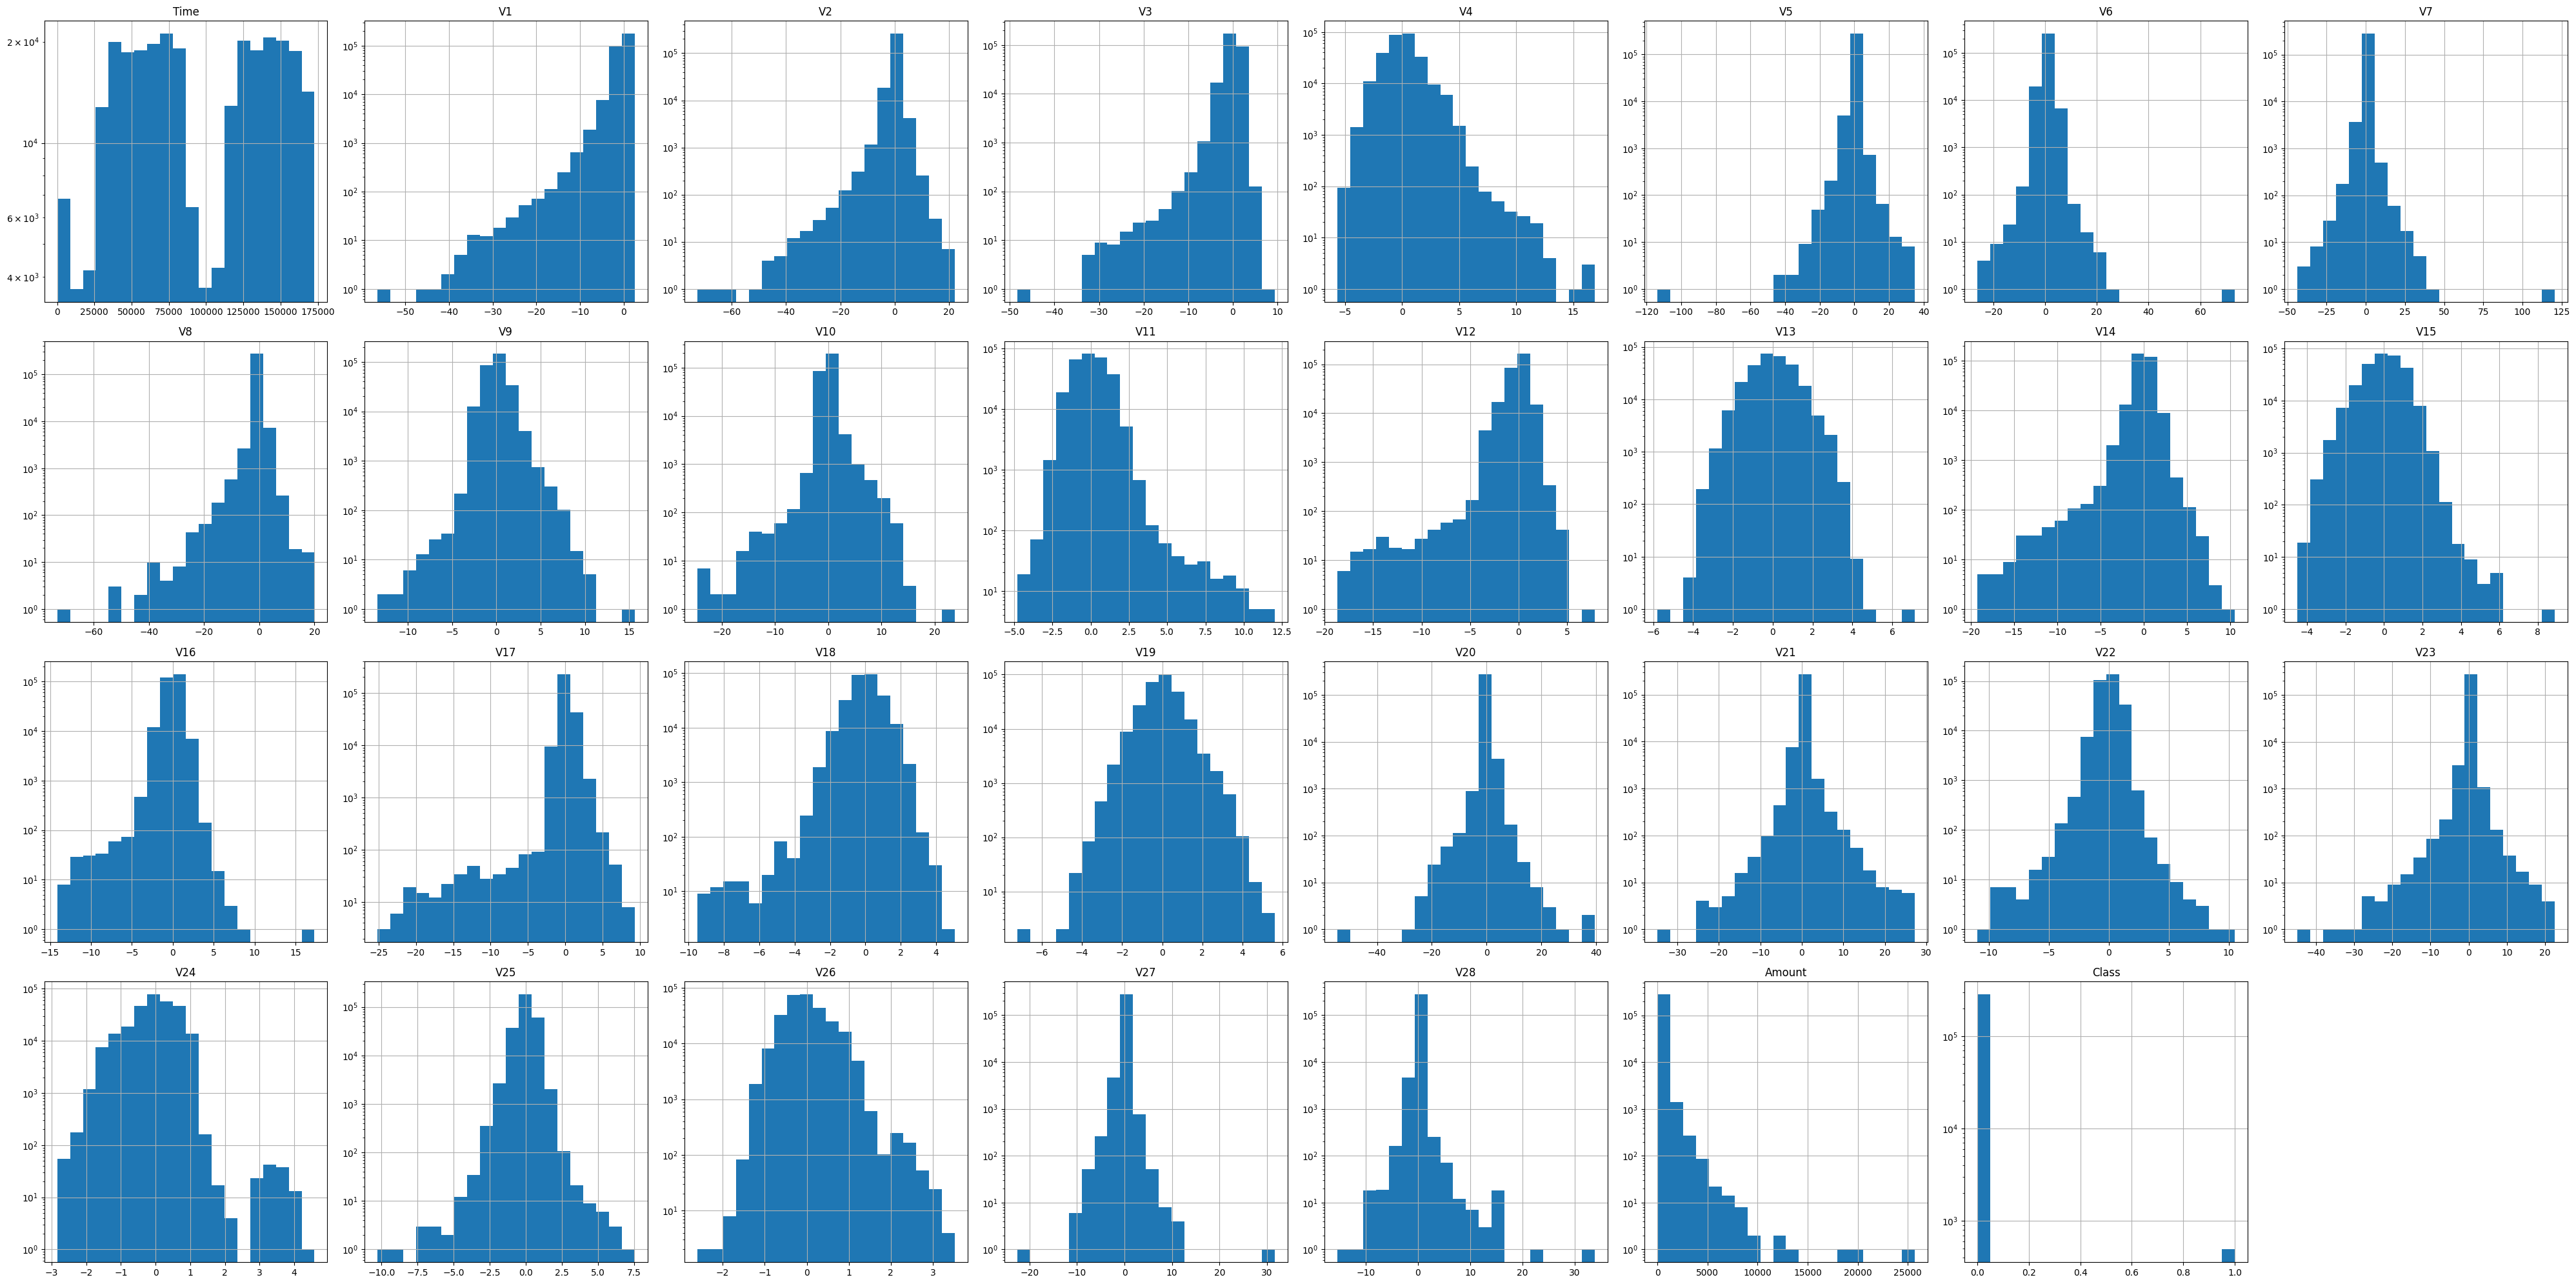

In [6]:
imprimeHistogramas(df_cc, df_cc.columns, 4, 8)

**Distribuição dos valores das transações  fraudulentas e não fraudulentas**  
Aqui o objetivo é verificar a distribuição dos valores para cada variável, para visualizar para quais
variáveis há diferenças na distribuição dos valores para cada classe **0 (não fraude) classe** **1 (fraude) classe**

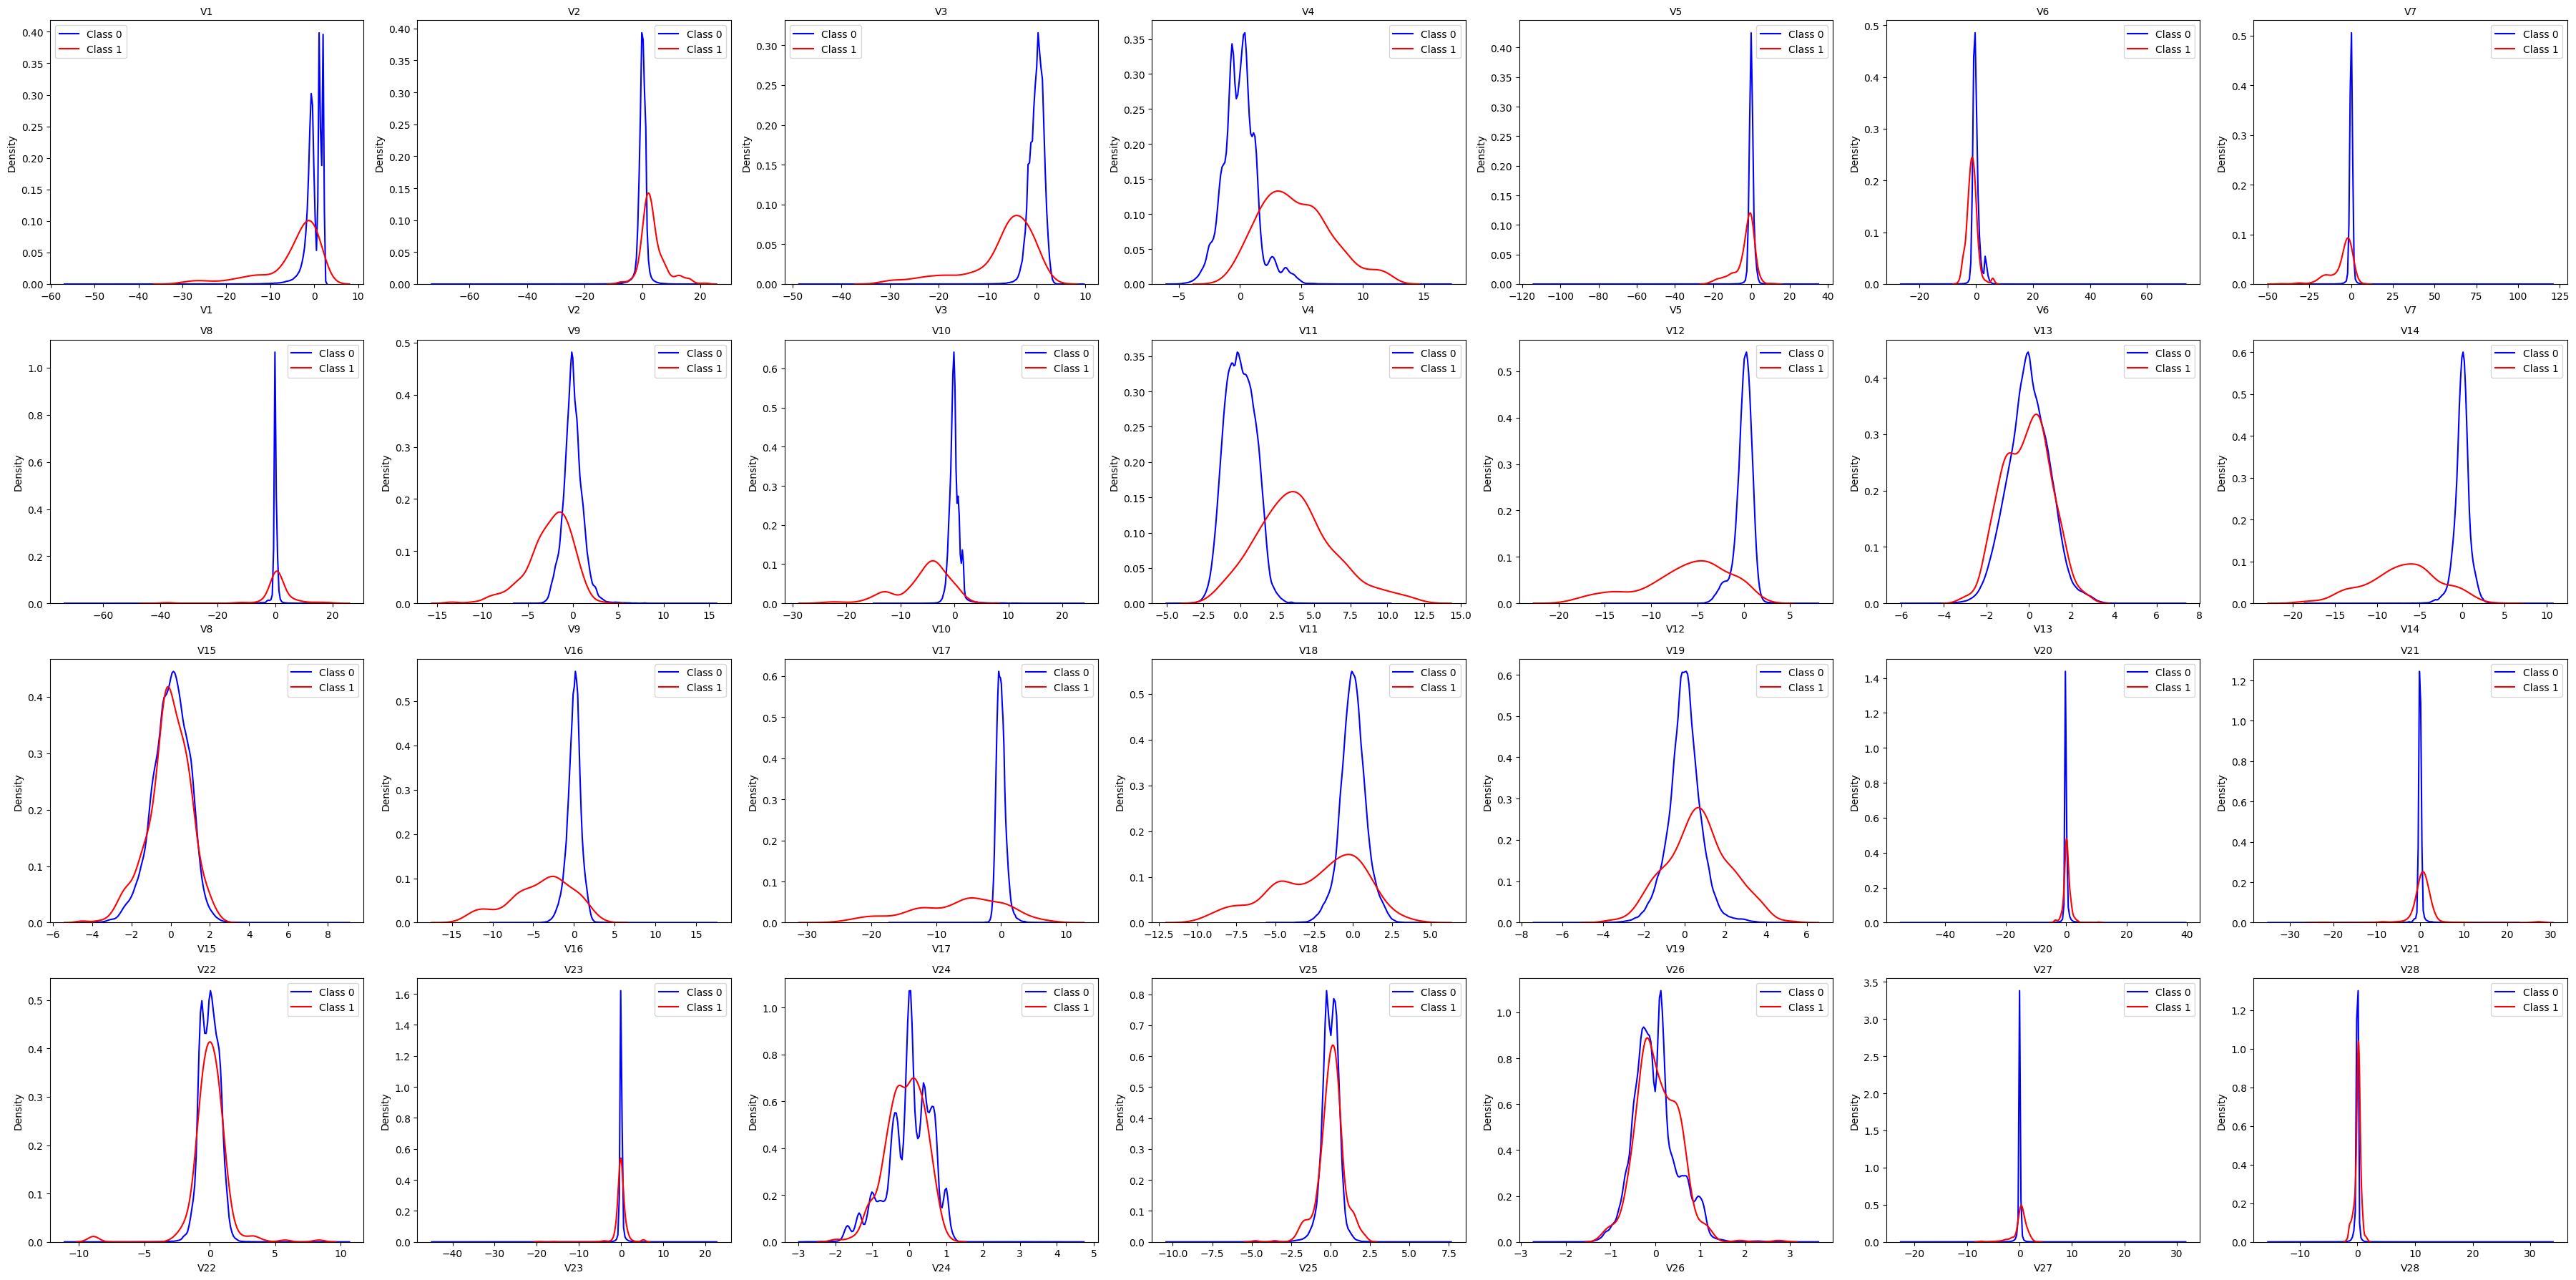

In [8]:
column_names = df_cc.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)

# criar novo dataframe para classe, não fraude (0) e fraude(1)
df_class_0 = df_cc.query("Class == 0")
df_class_1 = df_cc.query("Class == 1")

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(36, 18))
fig.subplots_adjust(hspace=1, wspace=1)

# Para cada coluna do dataframe é plotada a distribuição, tanto do dataframe com dados da classe 0, como da classe 1. 
# Ambos sobrepostos no mesmo plot para facilitar a comparação.
idx = 0
for col in column_names:
    idx += 1
    plt.subplot(4, 7, idx)
    sns.kdeplot(df_class_0[col], label='Class 0',color='b')
    sns.kdeplot(df_class_1[col], label='Class 1', color='r')
    plt.title(col, fontsize=10)
    plt.legend()
    
plt.tight_layout()
# plt.savefig('kde.png')
plt.show()

**Verificar a coorelação entre as variáveis
Os trechos de código abaixo:**

* Imprimem a correlação de todas as variáveis dependentes com a variável Class.
* Imprimem a correlação de Pearson de todas as variáveis.
* Plota a correlação de Pearson para todas as variáveis.

In [9]:
# Correlações de todas as variáveis (dependentes) com a variável Class (independente)
df_cc.corr()['Class'].sort_values(ascending=True)

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

In [10]:
df_cc.corr(method='pearson')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


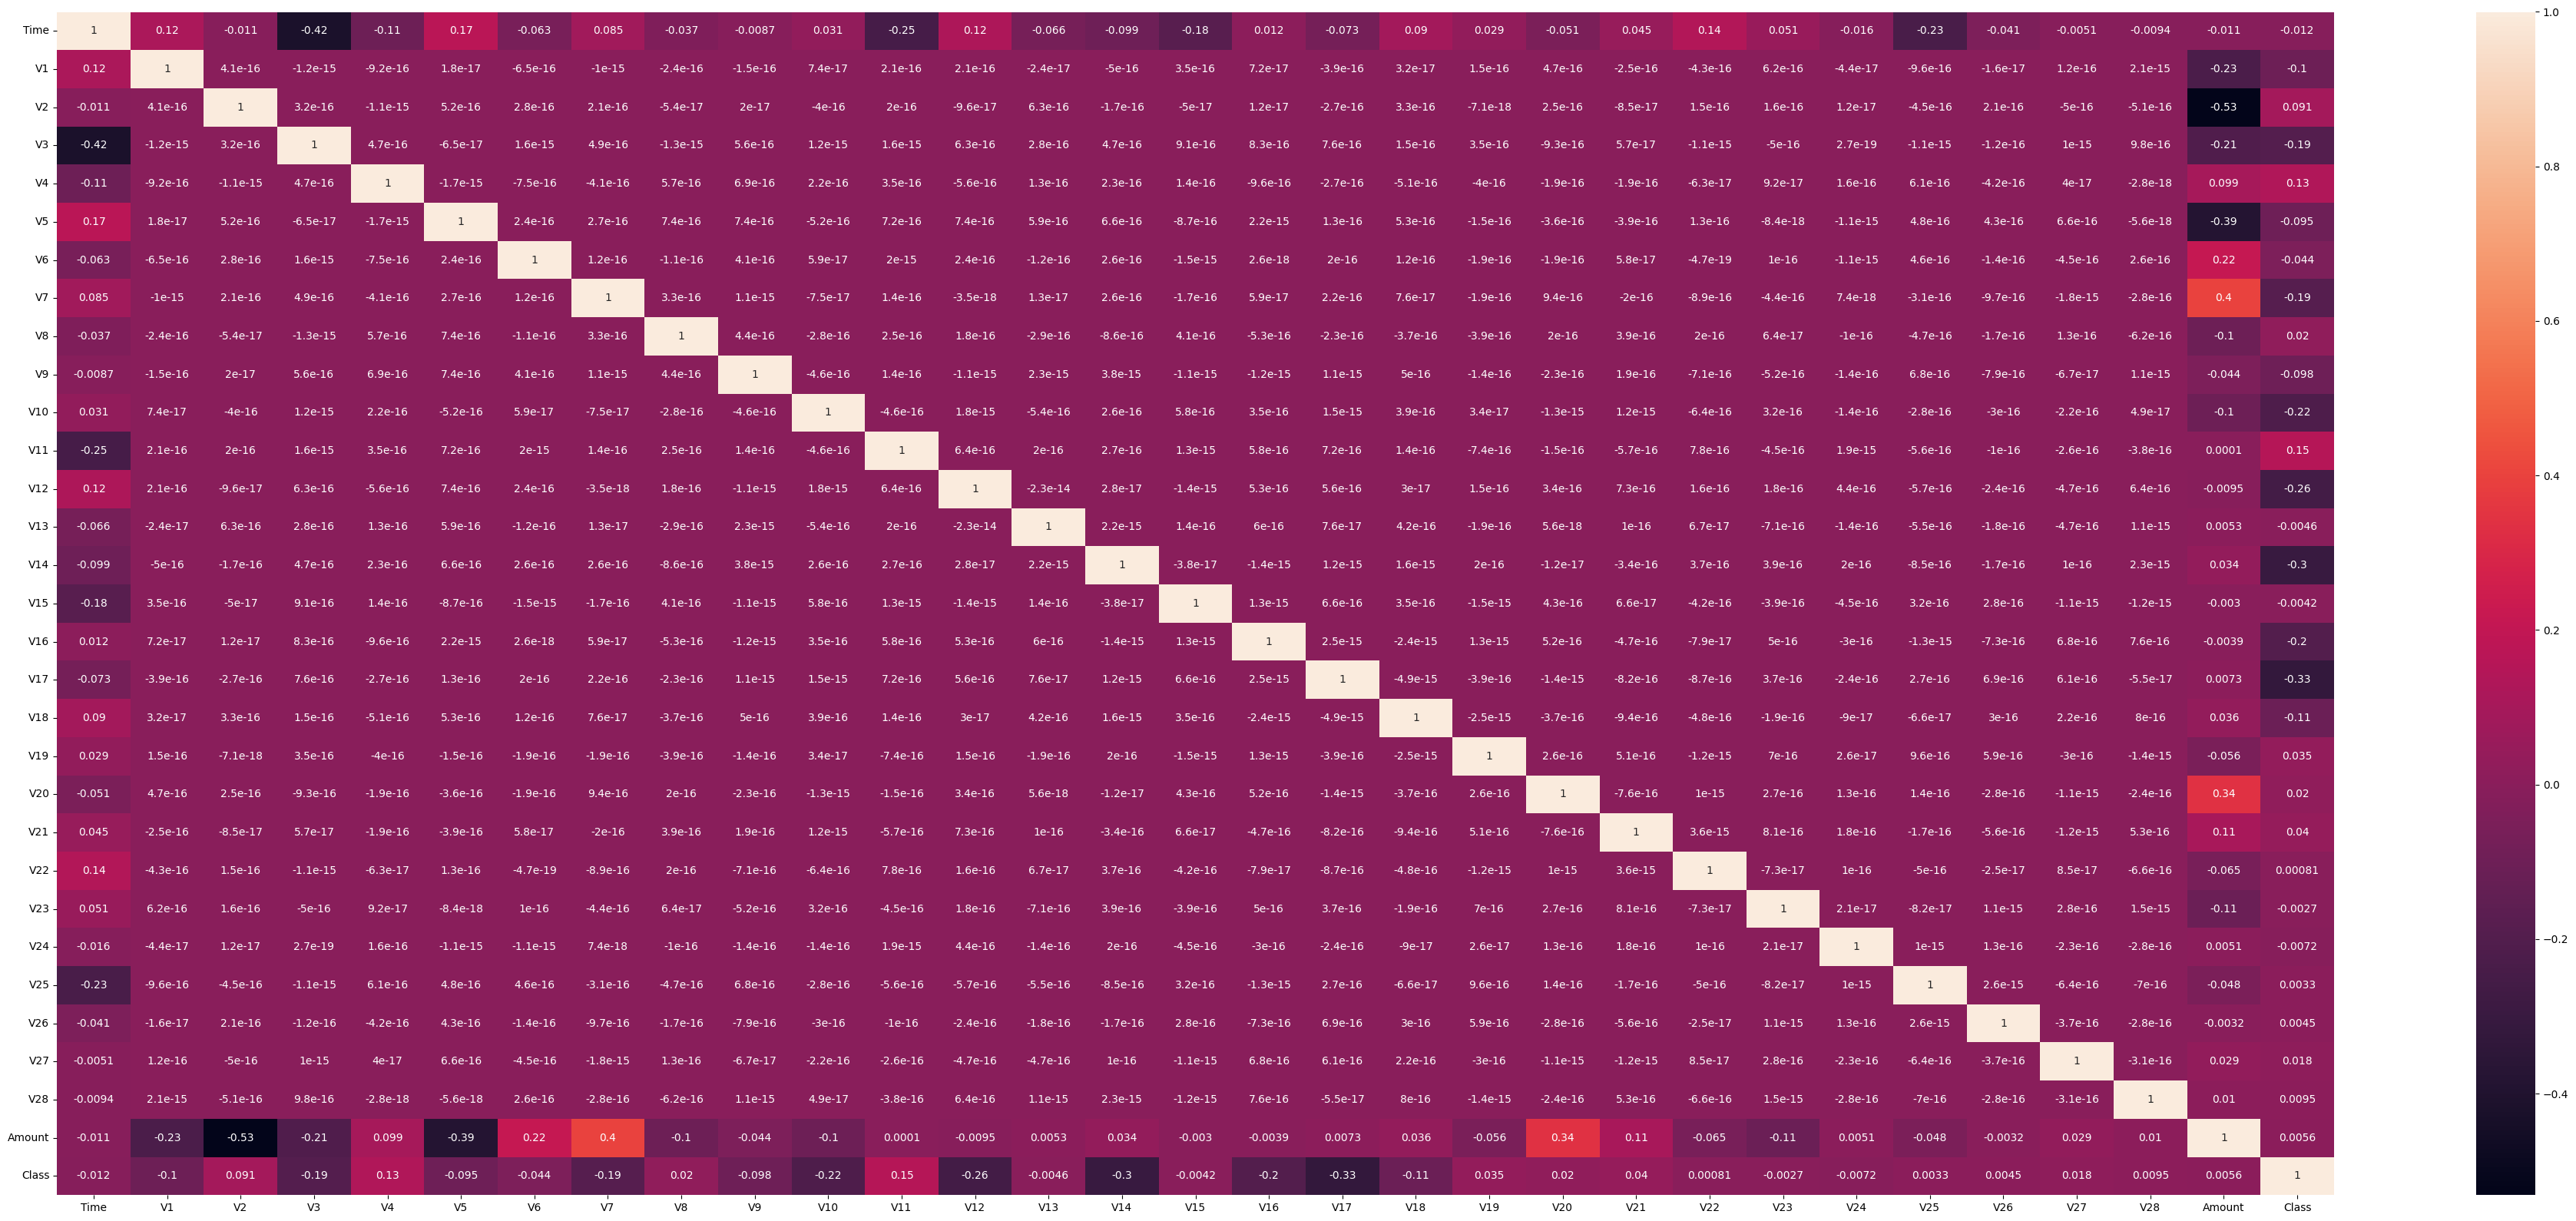

In [11]:
plt.figure(figsize = (38,16))
sns.heatmap(df_cc.corr(method='pearson'), annot = True)
plt.tight_layout()
plt.show()

#### Verificar quantos registros estão classificados como fraudulentos e não fraudulentos

In [12]:
# Verifica a quantidade de registros pra cada tipos de classe
"""
0 - Não fraude
1 - Fraude
"""
df_cc.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

##### Visualizar quantos registros existem para cada classe

Existe um desbalanceamento muito grande entre as duas classes (0-não fraude) e (1-fraude). Como a quantidade de dados da classe 1 representa apenas 0.17% dos dados, não é possível visualizar facilmente no gráfico abaixo a olho nú, porém dá pra se ter uma visualização do quanto as classes estão desbalanceadas.

* 284315 registros da classe 0.
* 492 registros da classe 1.

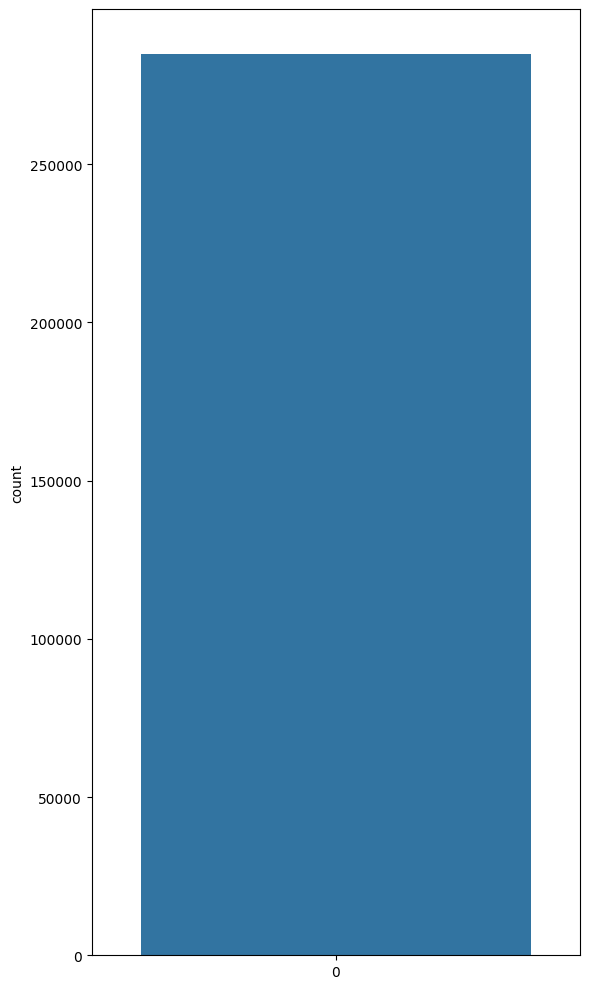

In [13]:
# Visualizando a quantidade de transações para cada classe.
plt.figure(figsize=(6,10))
sns.countplot(df_cc.Class)
plt.tight_layout()
# plt.savefig('countplot_class_0_1.png')
plt.show()

#### Descrição dos valores das transações não fraudulentas (0) e fraudulentas (1).
Os trechos de código abaixo apresentam a descrição dos valores das transações da classe 0, e também da classe 1. Pela descrição dos dados de cada classe já dá pra ter uma breve ideia da distribuição dos valores das transações para cada classe.

In [14]:
# Verifica os tipos de dados não fraude
"""
Verifica a descrição dos valores das transações quando não foram fraudes
"""
df_nao_fraude = df_cc.Amount[df_cc.Class == 0]
df_nao_fraude.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
# Verifica os tipos de dados fraudulentos
"""
Verifica a descrição dos valores das transações quando foi fraude
"""
df_fraude = df_cc.Amount[df_cc.Class == 1]
df_fraude.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Visualizar a distribuição dos valores das transações para cada tipo de transação, não fraudulenta (0) e fraudulenta (1).
O objetivo aqui é verificar além da distribuição de valores ($) para cada tipo de transação, mas também a localização, dispersão, assimetria, comprimento da cauda e outliers, conforme a definição de boxplot.

* Distribuição dos valores das transações não fraudulentas.
* Distribuição dos valores das transações fraudulentas.

In [21]:
# fig, ax = plt.subplots(figsize=(6,10), sharex=True)
# Definição de paleta de cores. Para a classe 0 (cor azul), para a classe 1 (cor vermelha)
# my_palette = my_pal = {0: "b", 1: "r"}
# Boxplot do valor por cada tipo de classe.
# sns.boxplot(df_cc.Class, df_cc.Amount, ax=ax)
# plt.ylim((-20, 400))
# plt.xticks([0, 1], ['Normal', 'Fraude'])
# plt.tight_layout()
# plt.savefig('boxplot_class_amount.png')
# plt.show()

In [20]:
"""
Plotagem do prejuizo atual da empresa x prejuizo restante após adoção do modelo de ML
"""
# Dados de 1 dia
soma_um_dia_fraude = sum(df_cc.Amount[df_cc.Class == 1])
soma_um_dia_fraude_evitado = soma_um_dia_fraude - (soma_um_dia_fraude * 0.81)
lucro_um_dia = soma_um_dia_fraude - soma_um_dia_fraude_evitado
print(f'Prejuizo por meio de fraude antes: {round(soma_um_dia_fraude, 2)}')
print(f'Prejuizo por meio de fraude depois: {round(soma_um_dia_fraude_evitado, 2)}')
print(f'Redução do prejuízo (Lucro) em um dia: {round(lucro_um_dia, 2)}')
print('*'*50)

# Simulando o mesmo cenário para 30 dias. 
# Aqui está sendo considerado apenas um cenário hipotético, desconsiderando qualquer variação que poderia ocorrer no volume das transações ao longo do 30 dias.
print(f'Prejuizo por meio de fraude antes - 30 dias: {round(soma_um_dia_fraude*30, 2)}')
print(f'Prejuizo por meio de fraude depois - 30 dias: {round(soma_um_dia_fraude_evitado*30, 2)}')
print(f'Redução do prejuízo (Lucro) em um mês: {round(lucro_um_dia*30, 2)}')

# df_fraude_um_dia = pd.DataFrame({'prejuizos':['Antes', 'Depois'], 'valores':[soma_um_dia_fraude, soma_um_dia_fraude_evitado]})
# fig, ax = plt.subplots(figsize=(6,10), sharex=True)
# my_palette = my_pal = {'Antes': "r", 'Depois': "b"}
# sns.barplot(df_fraude_um_dia['prejuizos'], df_fraude_um_dia['valores'], ax=ax, palette=my_palette)
# plt.ylim((-20, 61000))
# plt.xlabel('Prejuizos (antes e após adoção do modelo de ML)\n 1 dia de transações')
# print('\n\n')

# plt.tight_layout()
# plt.savefig('barplot_reducao_prejuizos.png')
# plt.show()

Prejuizo por meio de fraude antes: 60127.97
Prejuizo por meio de fraude depois: 11424.31
Redução do prejuízo (Lucro) em um dia: 48703.66
**************************************************
Prejuizo por meio de fraude antes - 30 dias: 1803839.1
Prejuizo por meio de fraude depois - 30 dias: 342729.43
Redução do prejuízo (Lucro) em um mês: 1461109.67


# 2 Revisão Teórica
Uma pessoa ou uma organização realiza de forma intencionada uma repre-
sentação falsa sobre um fato ou evento importante.
* A representação falsa é acreditada pela vítima (que é a pessoa ou organiza-
ção a quem a representação foi feita).
* A vítima confia e age sobre a representação falsa.
* A vitima sofre perda financeira e/ou propriedade como resultado de confiar e
agir sobre a representação falsa.

### 2.2.1 Função Resposta

O modelos de Regressão Logística é um tipo de modelo linear generalizado
onde as variáveis respostas $𝑌_{1}$ , ..., $𝑌_{𝑛}$ são independentes e binárias com:

$$ Y_{i} ~ Bernoulli(\pi_{i}) $$

Sendo a família Bernoulli exponencial. Sabendo que a representação de $Y_{i}$ que é $EY_{i} = \pi_{i} = p(Y_{i} = 1)$, 
A Regressão Logística é descrita como relação  de $\pi_{i}$ com $X_{i}$  
conforme a seguir:

$$ log(\frac{\pi_{i}}{1 - \pi_{i}}) = \alpha + \beta X_{i}$$  

Onde $\alpha$ é constante, que rerpesenta a intercepção da reta com o eixo  vertical e o $\beta$ representa a inclinação (coeficiente  angular) em
relação à variável $X_{i}$
Interpretando a equação anterior temos que o lado esquerdo representa o *log*  das chances de sucesso para $Y_{i}$. O modelo assume que este *logito*
é uma função linear da preditora $X_{i}$.

A função de probabilidade de *Bernoulli* pode ser escrita na forma de família exponencial:

$$  \pi_{i}^{y_{i}^*}(1 - \pi_{i})^{1-y_{i}^*} = (1 - \pi) e^{y_{i}log(\frac{\pi_{i}}{1-\pi_{i}})} $$

Realizando uma ligação canônica, ao utilizar o parâmetro natural $log(\frac{\pi_{i}}{1 - \pi_{i}})$ podemos reescrever a equação  da seguinte forma:

$$ \pi_{i} = \frac{e^{\alpha + \beta x_{i}}}{1 + e^{\alpha + \beta x_{i}}} $$

Fazendo $\pi$ uma função de $x_{i}$:

$$ \pi_{i}(x) = \frac{e^{\alpha + \beta x_{i}}}{1 + e^{\alpha + \beta x_{i}}} $$

### 2.2.2 Estimação dos Parêmetros

Como no modelo  com $Y_{i} ~ Bernoulli(\pi)$ não existe uma conexão direta entre $Y_{i}$ e $\alpha + \beta x_{i}$ não é possível 
utitlizar diretamente os mínimos quadrados.Assim o método de estimação  a ser utilizado é a máxima versossimilhança, se considerarmos
$F_{i} = \pi(x_{i})$ temos:

$$ L(\alpha, \beta|y) = \prod_{i = 1}^{n} \pi(x_{i})^{y_{i}}(1 - \pi(x_{i}))^{1 - y_{i}} = \prod_{i = n}^{n} F_{i}^{y_{i}}(1 - F_{i})^{1 - y_{i}} $$

Com o log da Verossimilhança temos:

$$ log L(\alpha, \beta|y) = \sum_{x = 1}^{n} (log(1 - F_{i}) + y_{i} log(\frac{F_{i}}{1 - F_{i}})) $$ 

### 2.3 Apredizagem de Máquina
O aprendizado de máquina é um novo campo da ciência que surgiu com o
intuito de extrair valor/conhecimento tendo como origem grandes bases de dados,
muitas vezes a motivação para utilizar estas técnicas é criar um algoritmo capaz de
imitar ou até mesmo melhorar o desempenho alcançado por um ser humano.

### 2.3.1 Apredizado Supervisionado

No aprendizado supervisionado como apresentado por Barber (2012) existe
uma base de dados prévios com as características dos dados que denotaremos por
𝑥 e sua classificação que denotaremos por 𝑦. Neste processo é criada uma base
de treinamento, com uma amostra dos dados, onde o algoritmo irá identificar quais
características presentes em 𝑥 são suficientes para chegar à classificação de 𝑦.

### 2.3.2 Aprendizado Não Supervisionado
No aprendizado não-supervisionado não existe uma base de dados prévia que
permite que os modelos sejam desenvolvidos com uma base de treinamento, portanto
o modelo deverá ser executado conforme as informações são geradas. Esta abordagem visa identificar padrões em bases de dados, mas sem a existência de uma
resposta prévia para a classificação que será identificada.

### 2.3.3 Aprendizado Semi-supervisionado
No aprendizado de máquina, é comum possuir uma pequena quantidade de
dados rotulados frente a uma grande quantidade de dados não rotulados. Um exemplo
deste caso é quando possuímos uma grande quantidade de fotos de plantas a serem
classificadas, entretanto apenas um pequeno número das fotos foi rotulado por serem
conhecidas.